In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect 

In [32]:
#create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [33]:
#reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect= True)



OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [ ]:
# View all of the classes that automap found
Base.classes.keys()

[]

In [ ]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

AttributeError: measurement

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
#Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0] 

NameError: name 'measurement' is not defined

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data_df = pd.DataFrame(precip_data)
precip_data_df.head()

# Sort the dataframe by date
sort_df = precip_data_df.sort_index()
sort_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot(figsize=(8, 4))
plt.ylabel("Inches")
plt.xlabel("Date")
plt.legend(title="Precipitation")
plt.xticks(rotation = 90)

plt.show()

NameError: name 'measurement' is not defined

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
sort_df.describe()

NameError: name 'sort_df' is not defined

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.name)).count()

NameError: name 'Session' is not defined

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_rank = session.query(measurement.station, func.count(measurement.station)).\
                    group_by(measurement.station).\
                    order_by(func.count(measurement.station).desc()).all()
station_rank

NameError: name 'measurement' is not defined

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_rank[0][0]
most_active_station

NameError: name 'station_rank' is not defined

In [ ]:
temp_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                filter(measurement.station==most_active_station).all()
temp_stats

NameError: name 'measurement' is not defined

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.tobs).filter(measurement.station == most_active_station).\
                filter(measurement.date >= one_year_ago).\
                order_by(measurement.date.desc()).all()
temp_df = pd.DataFrame(temp_data)
temp_df.head()

NameError: name 'measurement' is not defined

Text(0.5, 4.183333333333314, 'Temperature')

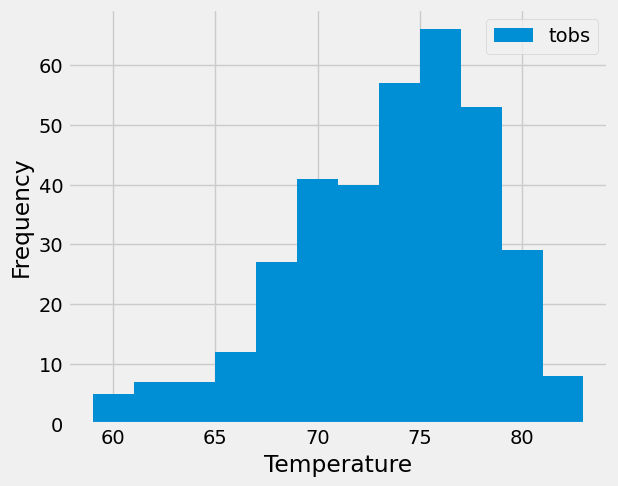

In [ ]:
# Plot a histogram
plt.hist(temp_df['tobs'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()

NameError: name 'session' is not defined